# ANALYSIS OF THE MOVIE PRODUCTION INDUSTRY

## 1. INTRODUCTION
This analysis helps movie producers understand the market better by looking at past films to see which types of movies perform well, how much money is usually spent on them, and how that affects their success, so they can plan their budgets wisely and make better decisions for future projects.

## 2. BUSINESS UNDERSTANDING
In today’s highly competitive film industry, production companies face increasing pressure to make informed decisions that minimize financial risk while maximizing returns. Before investing in our new project, it’s important to understand how different movie features — such as genre,production budget, and release timing influence audience reception.

The goal of this analysis is to help the business:
- Identify which genres tend to perfom well in terms of rating
- Determine the trends on genre popularity over time
- Calculate trends on production budget over the years
- Calculate trends of aundience engagement over the years
- Compare domestic and worldwide gross over the years

## 2.1. Objectives
1. To identify the top 10 most produced genres
2. To identify the top rated movie genres
3. To calculate trends of production budget over the years
4. Determining how audience engagement to a movie changes over the years
5. Comparing average domestic and worldwide gross of movies and the trend with time

## 3. DATA UNDERSTANDING
For this analysis, we used two Datasets, one from IMDB, which contains movie title, average ratings and start year. The other dataset was from The numbers, wich contains production budget and both domestic and worldwide gross that movies made.

## 4. DATA PREPARATION


In [1]:
# Import all the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
# Import zipfile for unzipping the zipped file
import zipfile
import os

In [3]:
# Create a temporary folder, import IMDB then create a comnnection
zipfile.ZipFile("im.zip", 'r').extractall("tempo_folder")
conn = sqlite3.connect("tempo_folder/im.db")

In [5]:
# Query the DB using sqlite3
IMDB = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id) ;"""
                 , conn)

In [7]:
#Check the first 5 rows
IMDB.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [9]:
IMDB.shape

(73856, 8)

##### The IMDB Dataframe has 8 columns and 73,856 rows

In [12]:
# import the numbers dataframe
the_numbers = pd.read_csv("tn.movie_budgets.csv")
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
the_numbers.shape

(5782, 6)

##### The numbers dataframe above has 6 columns, and 5,782 rows

### 4.1. Data Cleaning

We begin by checking the number of missing values in both the datasets

In [18]:
round((IMDB.isnull().sum()/ len(IMDB))*100,2)

movie_id            0.00
primary_title       0.00
original_title      0.00
start_year          0.00
runtime_minutes    10.32
genres              1.09
averagerating       0.00
numvotes            0.00
dtype: float64

##### From the above output, 10.32% of data in the `runtime_minutes` column is missing, and 1.09% of data from the genres column is missing. These percentages are low and we can drop the missing values

In [21]:
IMDB = IMDB.dropna()

##### If we repeat the code above to check the % of missing values, we should get 0 in all columns

In [24]:
round((IMDB.isnull().sum()/ len(IMDB))*100,2)

movie_id           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
dtype: float64

#### The Numbers Dataset cleaning

In [27]:
round((the_numbers.isnull().sum()/ len(the_numbers))*100,2)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

##### If we look at the aspect of missing values, our data might look clean. But we need to check if each column has the appropriate data types.

In [30]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### Some columns are not assigned the appropriate data types. 

In [33]:
# Convert to datetime pandas 
the_numbers['release_date'] = pd.to_datetime(the_numbers['release_date'])

In [35]:
#Create a list of column names from the dataset
columns = ['domestic_gross', 'production_budget', 'worldwide_gross']

# Remove $ and commas, then convert to float
for col in columns:
    the_numbers[col] = the_numbers[col].replace(r'[\$,]', '', regex=True).astype(float)

In [37]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


##### Our datasets are now clean and ready to use

## 5. EXPLORATORY DATA ANALYSIS

## 5.1 Genres and Movie production

In [41]:
# Extract each individual genre from the genres column
IMDB['genres'] = IMDB['genres'].str.split(',')
IMDB= IMDB.explode('genres')
IMDB['genres'] = IMDB['genres'].str.strip()

In [43]:
# Retrieve the top 10 most occuring genres
genres = IMDB['genres'].value_counts().sort_values(ascending=False).nlargest(10)
genres.head()

genres
Drama          28394
Documentary    16423
Comedy         15514
Thriller        7583
Horror          6917
Name: count, dtype: int64

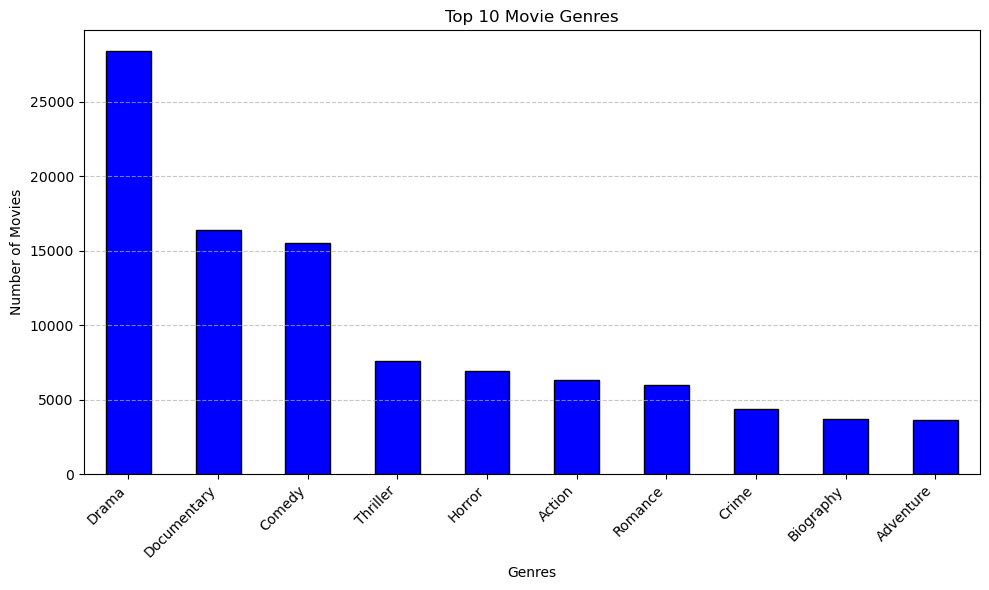

In [47]:
# Plot them below
plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### As from above, the most produced genre of movies is Drama, with  28,394 productions, followed by Documantaries with 16,423 productions. Comedy, Thriller and Horror also top the list. On the other side of the list, Short films, Adult films and Game show are the least produced categories of movies, with 1, 2, and 2 productions respectively

## 5.2. Genres on average rating

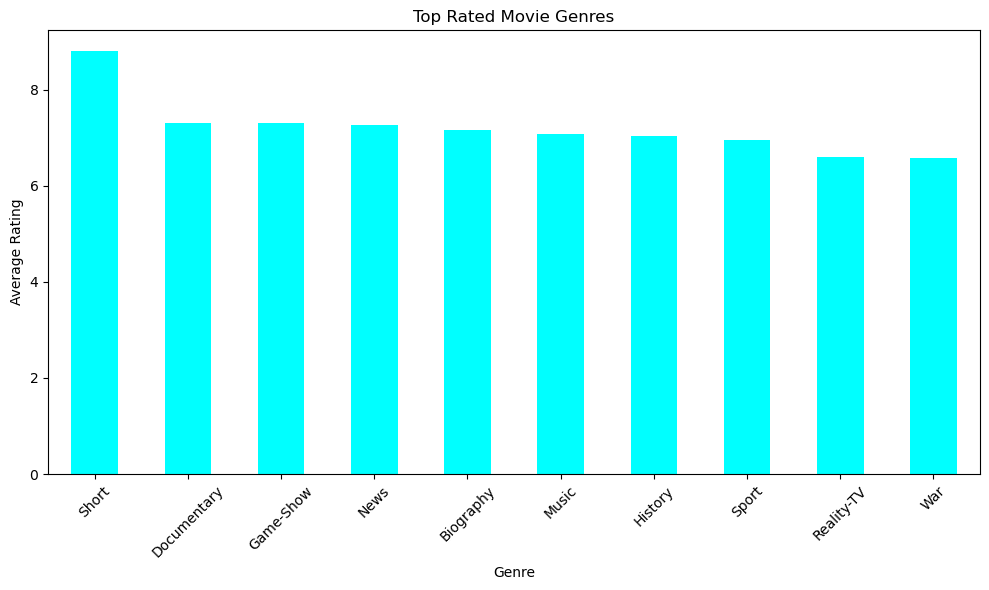

In [53]:
# Group by genre and get the average rating
genre_ratings = IMDB.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
#Get the first 10
top_genres = genre_ratings.head(10)
# Visualize
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='cyan')
plt.title('Top Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### As from the above visualization, we might be tricked to say that short films are the most rated genres. However, just above we saw that this genre is among the least produced, hence the reason for the high rating average. so in this case, the most rated genre of movies might be documentaries with a mean average rating of above 7 

## 5.3 Average rating per genre per year

In [56]:
# Group our data by genre and year, then calculate the mean rating each year
genre_yearly = IMDB.groupby(['start_year', 'genres'])['averagerating'].mean().reset_index()
#Create a filter metric
top_genres = (
    IMDB.groupby('genres')['averagerating'].mean()
    .sort_values(ascending=False)
    .head(10) 
    .index
)

In [58]:
# create a variable filtered and use the metric created above for filtering
filtered = genre_yearly[genre_yearly['genres'].isin(top_genres)]

In [60]:
# Create a pivot for visualization
pivot = filtered.pivot(index='start_year', columns='genres', values='averagerating')

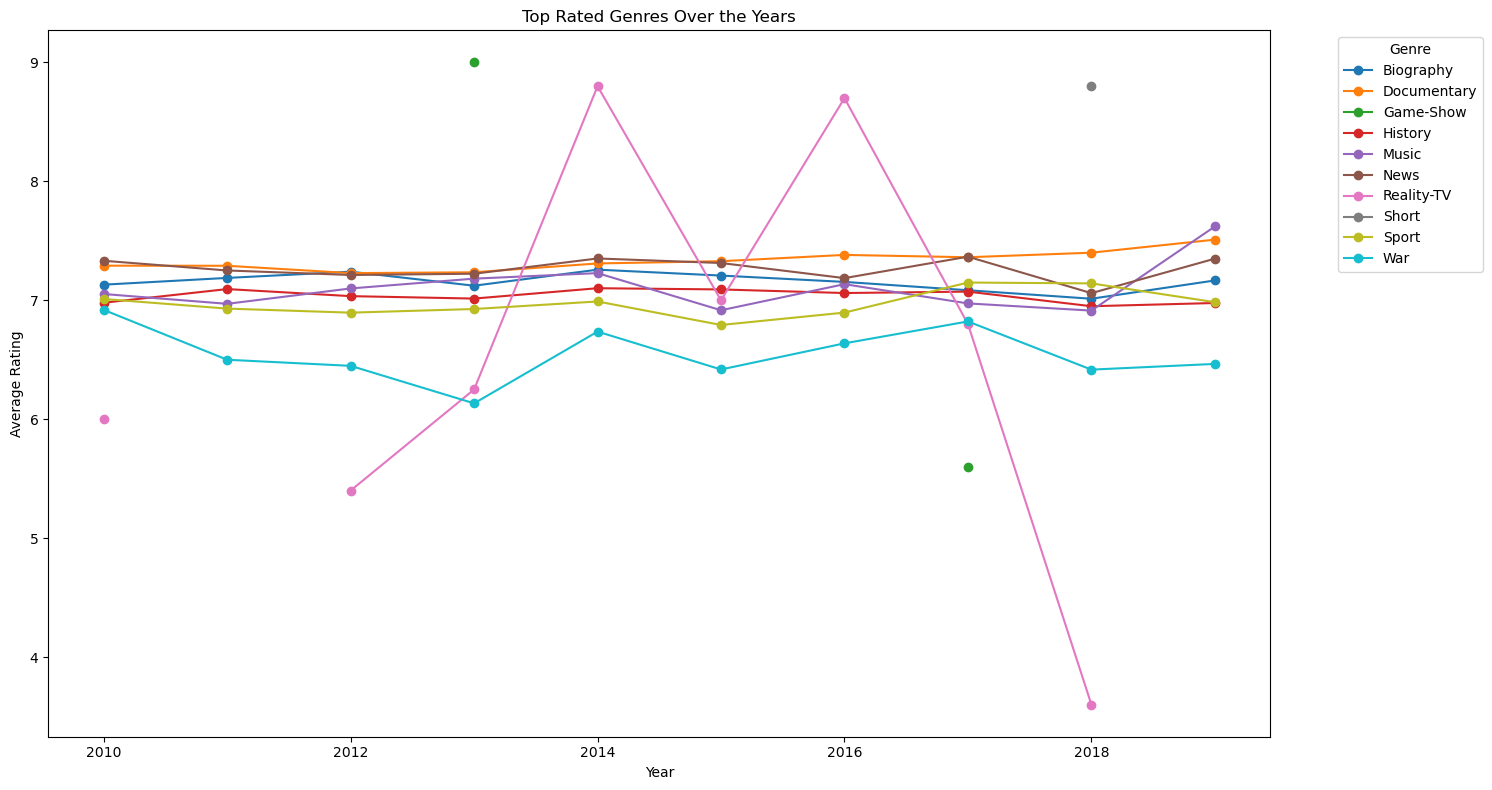

In [62]:
# Visualize
pivot.plot(figsize=(15, 8), marker='o')
plt.title('Top Rated Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### The ratings average at 7 in most of these genre. However there is an observable distinct behaviour wih `Reality-TV` genre. as we see significant shifts from an average rating of 5.5 in 2012 to an average rating of 8.8 in 2014 to less than 4 in 2018

## 5.4. Calculating production budget over the years

In [65]:
# create a column year for easy grouping of data
the_numbers['year'] = the_numbers['release_date'].dt.year
# Group the data by years
avg_budget_by_year = the_numbers.groupby('year', as_index=False)['production_budget'].mean()

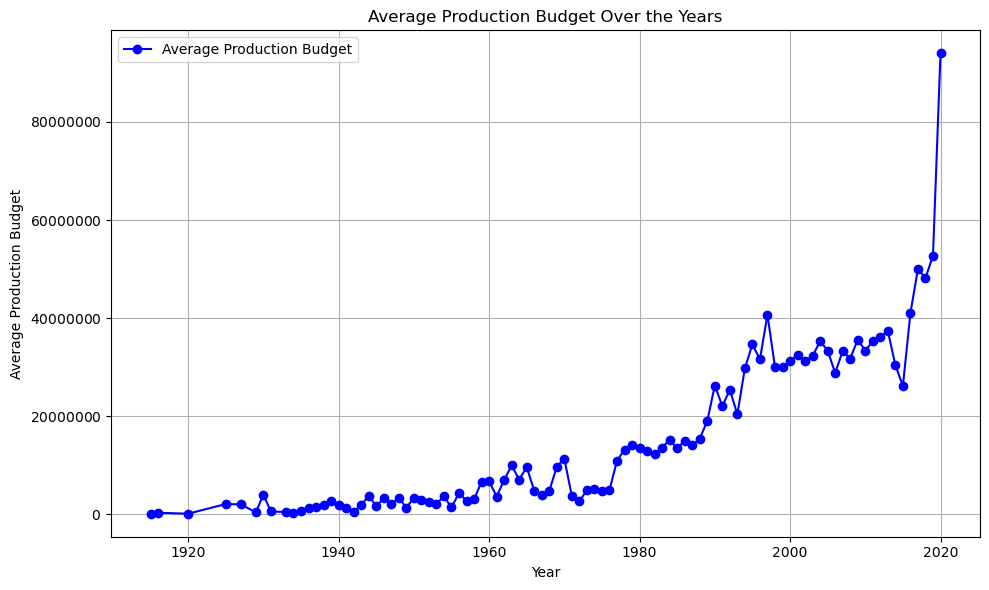

In [67]:
# Import ticker for marking our data
import matplotlib.ticker as ticker
# Plot the visualization
plt.figure(figsize=(10, 6))
plt.plot(avg_budget_by_year['year'], avg_budget_by_year['production_budget'], label='Average Production Budget', marker='o', color='blue')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### The production budget increases gradualy over the years

## 5.5. Audience engagement with time

C:\Users\USER\AppData\Local\Temp\ipykernel_28316\1001291074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_votes, x='start_year', y='numvotes', palette='inferno')


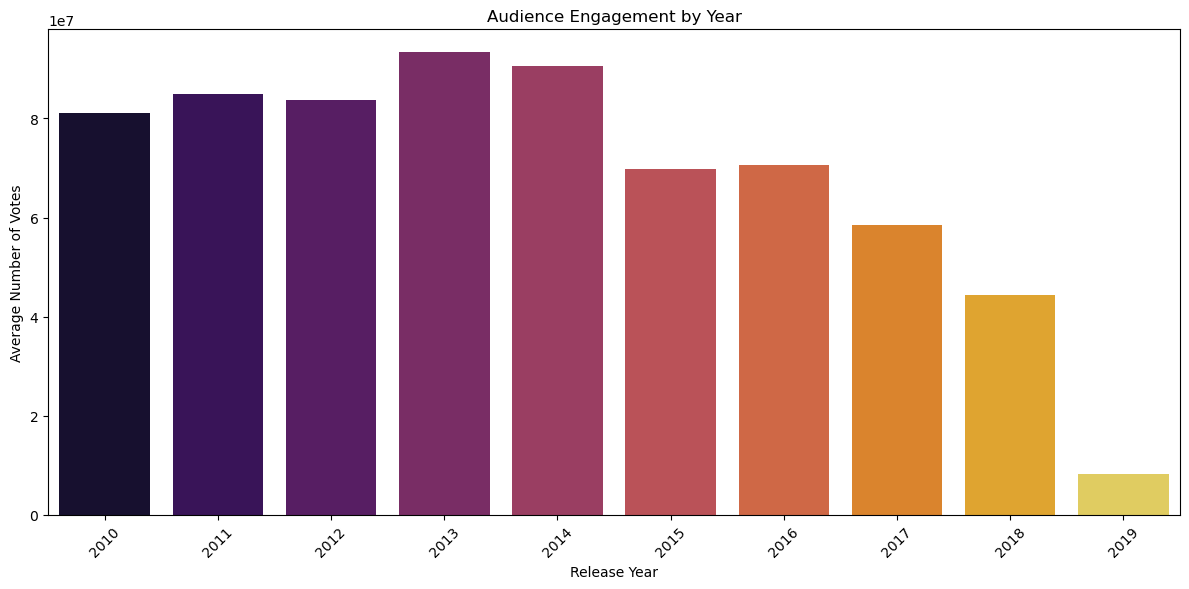

In [70]:
#Group by years and find the mean of number of votes
yearly_votes = IMDB.groupby('start_year')['numvotes'].mean().reset_index()
yearly_votes = IMDB.groupby('start_year', observed=True)['numvotes'].sum().reset_index()
# Begin to plot. we will be using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_votes, x='start_year', y='numvotes', palette='inferno')
plt.title('Audience Engagement by Year')
plt.ylabel('Average Number of Votes')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Average Yearly audience engagement is decreasing with time

## 5.6. Domestic gross and worldwide gross

In [73]:
# Group the gross by year and calculate the mean for each grouped data
gross_by_year = the_numbers.groupby('year')[['domestic_gross', 'worldwide_gross']].mean().reset_index()

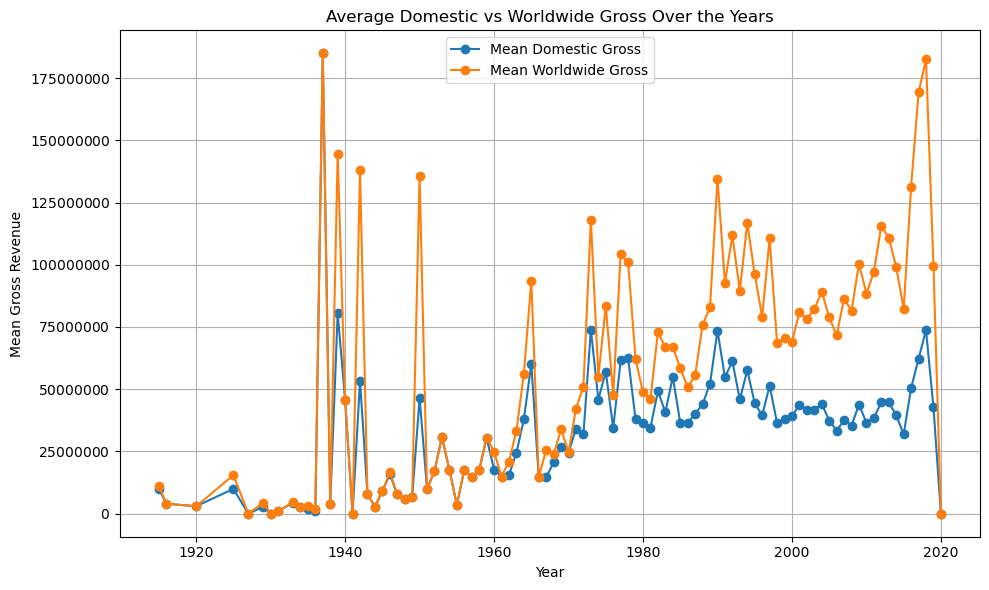

In [75]:
# Plot the visualization
plt.figure(figsize=(10, 6))
plt.plot(gross_by_year['year'], gross_by_year['domestic_gross'], label='Mean Domestic Gross', marker='o')
plt.plot(gross_by_year['year'], gross_by_year['worldwide_gross'], label='Mean Worldwide Gross', marker='o')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Mean Gross Revenue')
plt.title('Average Domestic vs Worldwide Gross Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Both domestic and worlwide gross have had a gradual incrase from the early 1900s to the 2010's where there is a visible gradual drop in anual gross both domestic and worldwide

## 6. Recommendations
1. Concider producing more documentaries and game-show movies as they tend to be more accepted by the audience
2. Avoid producing reality-Tv shows as they tend to be very unpredictable
3. The production budget tends to increase with time, possibly because of implementation of more technology. investing highly on movies might secure a higher chance of success
4. Concider producing films for international audience as worldwide gross is high

## 7. Conclussion
This analysis provides valuable insights into the key factors that influence a movie's success, such as genre, production budget, and audience ratings. We found that certain genres consistently receive higher ratings, while others perform better financially. There is also a clear link between budgeting decisions and gross income.

By understanding these patterns, movie producers can make more informed decisions about where to invest, what types of films to focus on, and how to better position their projects in a competitive market. These findings can help guide future production strategies, reduce financial risk, and increase the chances of creating successful and well-received films.

